In [0]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

class Edge(object):
    def __init__(self, u, v, w):
        self.source = u
        self.sink = v  
        self.capacity = w
    def __repr__(self):
        return "%s->%s:%s" % (self.source, self.sink, self.capacity)

class FlowNetwork(object):
    def __init__(self):
        self.adj = {}
        self.flow = {}
 
    def add_vertex(self, vertex):
        self.adj[vertex] = []
 
    def get_edges(self, v):
        return self.adj[v]
 
    def add_edge(self, u, v, w=0):
        if u == v:
            raise ValueError("u == v")
        edge = Edge(u,v,w)
        redge = Edge(v,u,0)
        edge.redge = redge
        redge.redge = edge
        self.adj[u].append(edge)
        self.adj[v].append(redge)
        self.flow[edge] = 0
        self.flow[redge] = 0
 
    def find_path(self, source, sink, path):
        if source == sink:
            return path
        for edge in self.get_edges(source):
            residual = edge.capacity - self.flow[edge]
            if residual > 0 and edge not in path:
                result = self.find_path( edge.sink, sink, path + [edge]) 
                if result != None:
                    return result
 
    def max_flow(self,G, source, sink): 
        id = 0                               
        path = self.find_path(source, sink, [])
        coordinates=[[1,1],[2,1],[2,2],[3,1],[3,3],[4,2]]
        vnode=np.array(coordinates)
        nodes=['s','o','p','q','r','t']
        while path != None:
            residuals = [edge.capacity - self.flow[edge] for edge in path]
            flow = min(residuals)
            for edge in path:
                self.flow[edge] += flow
                self.flow[edge.redge] -= flow
                try:
                    G[edge.source][edge.sink]['flow']
                except KeyError:
                    dict_exists = False
                else:
                    dict_exists = True
                if(dict_exists):
                    G[edge.source][edge.sink]['flow']+=flow
                else:
                    G[edge.sink][edge.source]['flow']-=flow
                
            path = self.find_path(source, sink, [])
            npos=dict(zip(nodes,vnode))
            node_labels = {}
            for node in G.nodes:
              node_labels[node] = str(node)
            nx.draw_networkx_labels(G, npos, labels=node_labels)
            edge_labels={}
            for edge in G.edges :
              edge_labels[edge]=str(G.edges[edge]['flow']) + ' / ' + str(G.edges[edge]['weight'])
              #edge_labels[edge]=str(edge)
            nx.draw_networkx_edge_labels(G,npos,edge_labels=edge_labels)
            nx.draw(G,npos)
            plt.savefig("./temp"+str(id)+".png")
            id=id+1

        ##interact(view_image, i=(0,n-1))
        return sum(self.flow[edge] for edge in self.get_edges(source))
def view_image(i):
  plt.imshow(imgs[i], cmap=plt.cm.gray_r, interpolation='nearest')
  plt.show()


In [0]:
g=FlowNetwork()

In [16]:
[g.add_vertex(v) for v in "sopqrt"]

[None, None, None, None, None, None]

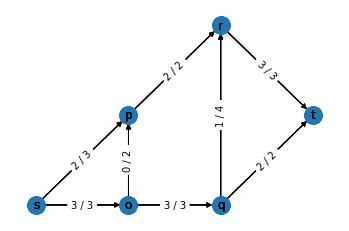

interactive(children=(IntSlider(value=2, description='i', max=4), Output()), _dom_classes=('widget-interact',)…

<function __main__.view_image>

In [17]:
import glob
from PIL import Image
G = nx.DiGraph()
[G.add_node(v) for v in "sopqrt"]
G.add_edge('s','o',weight=3,flow=0,color='b')
G.add_edge('s','p',weight=3,flow=0,color='b')
G.add_edge('o','p',weight=2,flow=0,color='b')
G.add_edge('o','q',weight=3,flow=0,color='b')
G.add_edge('p','r',weight=2,flow=0,color='b')
G.add_edge('r','t',weight=3,flow=0,color='b')
G.add_edge('q','r',weight=4,flow=0,color='b')
G.add_edge('q','t',weight=2,flow=0,color='b')
g.add_edge('s','o',3)
g.add_edge('s','p',3)
g.add_edge('o','p',2)
g.add_edge('o','q',3)
g.add_edge('p','r',2)
g.add_edge('r','t',3)
g.add_edge('q','r',4)
g.add_edge('q','t',2)
n=g.max_flow(G,'s','t')

 
Datapath = "./*.png"
imgs = np.zeros((10, 288, 432, 4))
i = 0
for imageFile in glob.glob(Datapath ):
	img = np.array(Image.open(imageFile))
	imgs[i] = img
	i += 1
interact(view_image, i=(0,n-1))

In [0]:
from ipywidgets import interact